<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Count_Inversions_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Count Inversions

Write a function that takes in an array of integers and returns the number of inversions in the array. An inversion occurs if for any valid indices `i` and `j`, `i < j` and `array[i] > array[j]`.

For example, given `array = [3, 4, 1, 2]`, there are `4` inversions. The following pairs of indices represent inversions: `[0, 2], [0, 3], [1, 2], [1, 3]`.

Intuitively, the number of inversions is a measure of how unsorted the array is.

Sample Input

```
array = [2, 3, 3, 1, 9, 5, 6]
```



Sample Output

```
5
// The following pairs of indices represent inversions:
// [0, 3], [1, 3], [2, 3], [4, 5], [4, 6]
```



# Solution 1 : Brute-Force

In [1]:
# time O(n^2)
# sapce O(1)

def countInversions(array):
	count_inversion = 0
	for i in range(len(array)):
		for j in range(i, len(array)):
			if array[i] > array[j]:
				count_inversion += 1
	return count_inversion

In [2]:
array = [2, 3, 3, 1, 9, 5, 6]
countInversions(array)

5

# Solution 2

- apply mergesot and count inversion during merging

In [3]:
# time : O(nlog n)
# space : O(n)

def countInversions(array):
  return count_subarray_inversions(array, 0, len(array))

def count_subarray_inversions(array, start, end):
  if end - start <= 1:
    return 0

  middle = start + (end - start) // 2
  left_inversions_count = count_subarray_inversions(array, start, middle)
  right_inversions_count = count_subarray_inversions(array, middle, end)
  merged_array_inversions = merge_sort_and_count_inversion(array, start, middle, end)
  return left_inversions_count + right_inversions_count + merged_array_inversions


def merge_sort_and_count_inversion(array, start, middle, end):
  sorted_array = []
  left = start
  right = middle
  inversions = 0
  while left < middle and right < end:
    if array[left] <= array[right]:
      sorted_array.append(array[left])
      left += 1
    else:
      inversions += middle - left
      sorted_array.append(array[right])
      right += 1
  sorted_array += array[left:middle] + array[right:end]
  for idx, num in enumerate(sorted_array):
    array[start + idx] = num
  return inversions

In [4]:
array = [2, 3, 3, 1, 9, 5, 6]
countInversions(array)

5

In [5]:
array = [1, 2, 3, 4, 5, 6, -1]
countInversions(array)

6

## Conceptual Note

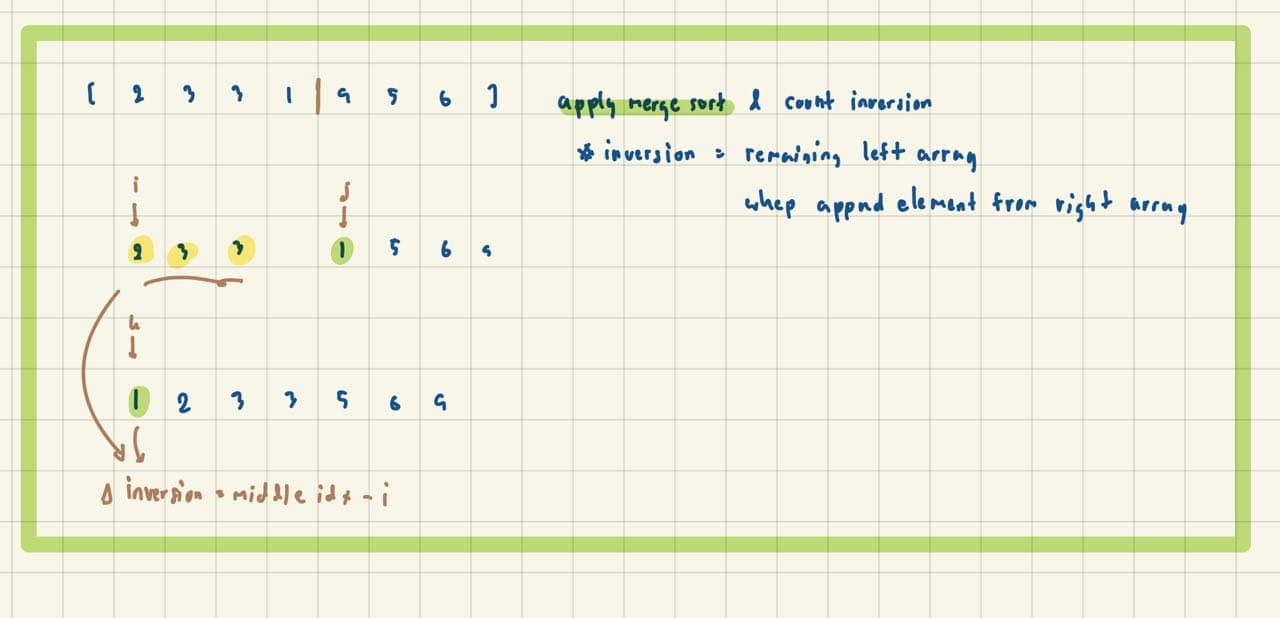

## Solution 3

- same as solution 2 but refactoring

In [6]:
# time : O(nlog n)
# space : O(n)

def countInversions(array):
  return count_subarray_inversions(array, 0, len(array) - 1)

def count_subarray_inversions(array, start, end):
  if end <= start:
    return 0

  middle = (start + end) // 2
  left_inversions_count = count_subarray_inversions(array, start, middle)
  right_inversions_count = count_subarray_inversions(array, middle + 1, end)
  merged_array_inversions = merge_sort_and_count_inversion(array, start, middle, end)
  return left_inversions_count + right_inversions_count + merged_array_inversions


def merge_sort_and_count_inversion(array, start, middle, end):
  sorted_array = []
  left = start
  right = middle + 1
  inversions = 0
  while len(sorted_array) < end - start + 1:
    if left <= middle and right <= end:
      if array[left] <= array[right]:
        sorted_array.append(array[left])
        left += 1
      else:
        inversions += middle + 1 - left
        sorted_array.append(array[right])
        right += 1
    elif left <= middle:
        sorted_array.append(array[left])
        left += 1
    elif right <= end:
        sorted_array.append(array[right])
        right += 1

  for idx, num in enumerate(sorted_array):
    array[start + idx] = num
  return inversions

In [7]:
array = [2, 3, 3, 1, 9, 5, 6]
countInversions(array)

5

In [8]:
array = [1, 2, 3, 4, 5, 6, -1]
countInversions(array)

6